# Preparing data set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()



In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [2]:
dataset_path = '/content/drive/My Drive/CelebA/'


In [3]:
!kaggle datasets download -d jessicali9530/celeba-dataset

Dataset URL: https://www.kaggle.com/datasets/jessicali9530/celeba-dataset
License(s): other
 99% 1.32G/1.33G [00:18<00:00, 189MB/s]
100% 1.33G/1.33G [00:18<00:00, 78.8MB/s]


In [18]:
!unzip celeba-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: img_align_celeba/img_align_celeba/197605.jpg  
  inflating: img_align_celeba/img_align_celeba/197606.jpg  
  inflating: img_align_celeba/img_align_celeba/197607.jpg  
  inflating: img_align_celeba/img_align_celeba/197608.jpg  
  inflating: img_align_celeba/img_align_celeba/197609.jpg  
  inflating: img_align_celeba/img_align_celeba/197610.jpg  
  inflating: img_align_celeba/img_align_celeba/197611.jpg  
  inflating: img_align_celeba/img_align_celeba/197612.jpg  
  inflating: img_align_celeba/img_align_celeba/197613.jpg  
  inflating: img_align_celeba/img_align_celeba/197614.jpg  
  inflating: img_align_celeba/img_align_celeba/197615.jpg  
  inflating: img_align_celeba/img_align_celeba/197616.jpg  
  inflating: img_align_celeba/img_align_celeba/197617.jpg  
  inflating: img_align_celeba/img_align_celeba/197618.jpg  
  inflating: img_align_celeba/img_align_celeba/197619.jpg  
  inflating: img_align_celeba/img_align_celeba/19

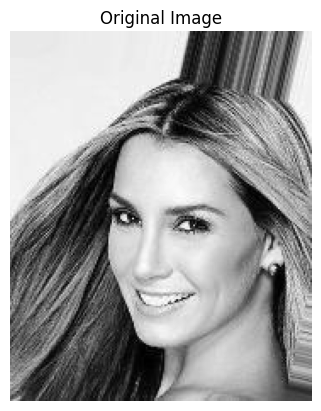

In [7]:
import cv2
import matplotlib.pyplot as plt
import os
dataset_path='/content/img_align_celeba/img_align_celeba/'

image_path = os.path.join(dataset_path, '000001.jpg')
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()


In [19]:
import os

dataset_path = '/content/img_align_celeba/img_align_celeba/'

input_folder = os.path.join('/content/CelebA/', 'input_images')
output_folder = os.path.join('/content/CelebA/', 'sobel_images')

os.makedirs(input_folder, exist_ok=True)
os.makedirs(output_folder, exist_ok=True)

print(f"Created directories:\n{input_folder}\n{output_folder}")


Created directories:
/content/CelebA/input_images
/content/CelebA/sobel_images


In [20]:
import os
import shutil
from glob import glob

source_dir = '/content/img_align_celeba/img_align_celeba/'
destination_dir = '/content/CelebA/input_images/'


image_files = glob(os.path.join(source_dir, '*.jpg'))


batch_size = 1000
for i in range(0, len(image_files), batch_size):
    batch_files = image_files[i:i + batch_size]
    for file_path in batch_files:
        shutil.move(file_path, destination_dir)

print(f"Moved {len(image_files)} files to {destination_dir}")


Moved 202599 files to /content/CelebA/input_images/


In [21]:
import cv2
import numpy as np
import os
from glob import glob

# Get list of all images in the input folder
image_paths = glob(os.path.join(input_folder, '*.jpg'))

# Sobel filter
def apply_sobel(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)                      # Convert to grayscale
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)                 # Sobel filter in the x direction
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)                 # Sobel filter in the y direction
    sobel_combined = cv2.magnitude(sobelx, sobely)                      # Combine the Sobel x and y results
    sobel_combined = cv2.convertScaleAbs(sobel_combined)                # Convert to 8-bit image
    return sobel_combined

# To apply image negative (invert the image s=255-r (assuming 8bit image))
def apply_negative(image):
    negative_image = cv2.bitwise_not(image)  # Invert the image (bitwise not)
    return negative_image

# Process each image
for img_path in image_paths:
    img_name = os.path.basename(img_path)

    img = cv2.imread(img_path)

    img_resized = cv2.resize(img, (224, 224))

    sobel_image = apply_sobel(img_resized)

    sobel_negative_image = apply_negative(sobel_image)

    sobel_img_path = os.path.join(output_folder, img_name)
    cv2.imwrite(sobel_img_path, sobel_negative_image)

print(f"Processed {len(image_paths)} images and saved to {output_folder}")


Processed 202599 images and saved to /content/CelebA/sobel_images


In [24]:
import os

image_files = [f for f in os.listdir(output_folder)
if f.endswith('.jpg')]

# Count the number of images
num_images = len(image_files)

print(f"Number of images in Sobel folder: {num_images}")


Number of images in Sobel folder: 202599


In [25]:
!zip -r input_output_images.zip /content/CelebA/input_images/ /content/CelebA/sobel_images/


Streaming output truncated to the last 5000 lines.
  adding: content/CelebA/sobel_images/021894.jpg (deflated 1%)
  adding: content/CelebA/sobel_images/085761.jpg (deflated 0%)
  adding: content/CelebA/sobel_images/053038.jpg (deflated 1%)
  adding: content/CelebA/sobel_images/161173.jpg (deflated 1%)
  adding: content/CelebA/sobel_images/007304.jpg (deflated 0%)
  adding: content/CelebA/sobel_images/140144.jpg (deflated 0%)
  adding: content/CelebA/sobel_images/044179.jpg (deflated 0%)
  adding: content/CelebA/sobel_images/134475.jpg (deflated 1%)
  adding: content/CelebA/sobel_images/044803.jpg (deflated 0%)
  adding: content/CelebA/sobel_images/127926.jpg (deflated 1%)
  adding: content/CelebA/sobel_images/139732.jpg (deflated 0%)
  adding: content/CelebA/sobel_images/141352.jpg (deflated 1%)
  adding: content/CelebA/sobel_images/022669.jpg (deflated 0%)
  adding: content/CelebA/sobel_images/006591.jpg (deflated 0%)
  adding: content/CelebA/sobel_images/085867.jpg (deflated 1%)
  ad

In [26]:
from google.colab import files

# Download the zip file
files.download('/content/input_output_images.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
!cp /content/input_output_images.zip /content/drive/MyDrive/CelebA

